<a href="https://colab.research.google.com/github/neihtfool/Fully-Connected-Neural-Network/blob/master/Fashion_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder


In [0]:
print(tf.__version__)

2.1.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_x_orig, train_y), (test_x_orig, test_y) = fashion_mnist.load_data()

Label: T-shirt/top


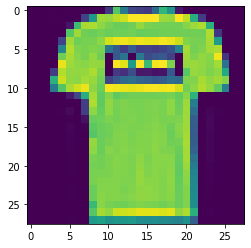

In [0]:
classes = ["T-shirt/top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

idx = 1
plt.imshow(train_x_orig[idx])
print("Label: " + classes[train_y[idx]])

In [0]:
train_x_orig.shape

(60000, 28, 28)

In [0]:
train_x = train_x_orig / 255.
test_x = test_x_orig / 255.

print("Shape of train_x: ", train_x.shape)
print("Shape of train_y: ", train_y.shape)
print("Shape of test_x: ", test_x.shape)
print("Shape of test_y: ", test_y.shape)

Shape of train_x:  (60000, 28, 28)
Shape of train_y:  (60000,)
Shape of test_x:  (10000, 28, 28)
Shape of test_y:  (10000,)


In [0]:
layer_dims = [128, 64, 10]

In [0]:
def build_model(layer_dims):
  model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28))])
  for l in layer_dims[:-1]:
    model.add(keras.layers.Dense(l, activation="tanh"))
    model.add(keras.layers.Dropout(0.2))
  
  model.add(keras.layers.Dense(len(classes)))
  
  return model

In [0]:
model = build_model(layer_dims)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [0]:
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________

In [0]:
history = model.fit(train_x, train_y, batch_size=32, epochs=500, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/500
48000/48000 [==============================] - 6s 121us/sample - loss: 0.5656 - accuracy: 0.7979 - val_loss: 0.4231 - val_accuracy: 0.8472
Epoch 2/500
48000/48000 [==============================] - 5s 113us/sample - loss: 0.4457 - accuracy: 0.8383 - val_loss: 0.4121 - val_accuracy: 0.8544
Epoch 3/500
48000/48000 [==============================] - 5s 114us/sample - loss: 0.4097 - accuracy: 0.8522 - val_loss: 0.3745 - val_accuracy: 0.8667
Epoch 4/500
48000/48000 [==============================] - 5s 112us/sample - loss: 0.3924 - accuracy: 0.8598 - val_loss: 0.3620 - val_accuracy: 0.8666
Epoch 5/500
48000/48000 [==============================] - 5s 114us/sample - loss: 0.3787 - accuracy: 0.8612 - val_loss: 0.3583 - val_accuracy: 0.8749
Epoch 6/500
48000/48000 [==============================] - 5s 111us/sample - loss: 0.3685 - accuracy: 0.8666 - val_loss: 0.3623 - val_accuracy: 0.8712
Epoch 7/500
48000/48000 [===================

10000/10000 - 0s - loss: 0.4626 - accuracy: 0.8814
Loss: 0.46261805201768874
Acc: 0.8814


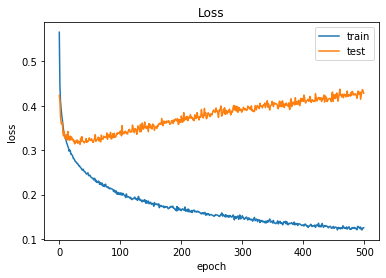

In [0]:
loss, acc = model.evaluate(test_x, test_y, verbose=2)
print("Loss:", loss)
print("Acc:", acc)

hist = history.history
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Prediction: 6
True Label = Shirt


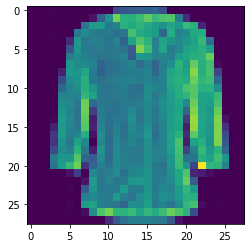

In [0]:
result = np.argmax(pred[4])
print("Prediction:", result)
print("True Label =", classes[result])
plt.imshow(test_x[4])